# Machine Learning with SVM: House Price Prediction & Digit Classification

# SVM (support vector machine)
 - Regression problem
 - classification problem
   - Binary
   - multiclass

In [ ]:
# Designed By  : ALTAF HUSAIN DATA ANALYST

# Housing Price Prdiction : Regression Problem (SVR)

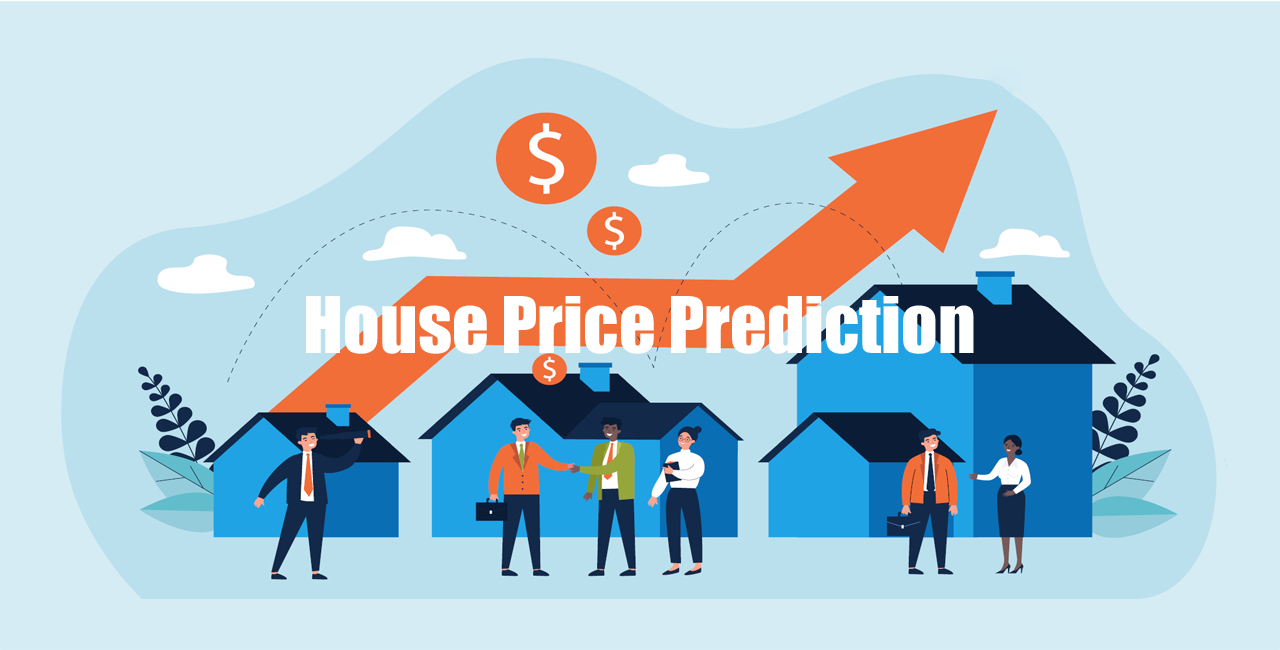

# step 1 : modules import

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.datasets import load_digits,fetch_california_housing
import warnings
warnings.filterwarnings('ignore')
print("All modules loaded succesfully")

All modules loaded succesfully


In [81]:
house = fetch_california_housing()
df = pd.DataFrame(house.data,columns= house.feature_names)
df[house.target_names[0]] = house.target

In [82]:
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
13444,2.1189,13.0,4.47792,1.164868,2475.0,2.428852,34.08,-117.43,1.217


In [83]:
# print(house['DESCR'])

In [84]:
X = df.iloc[:,:-1]
y = df['MedHouseVal']

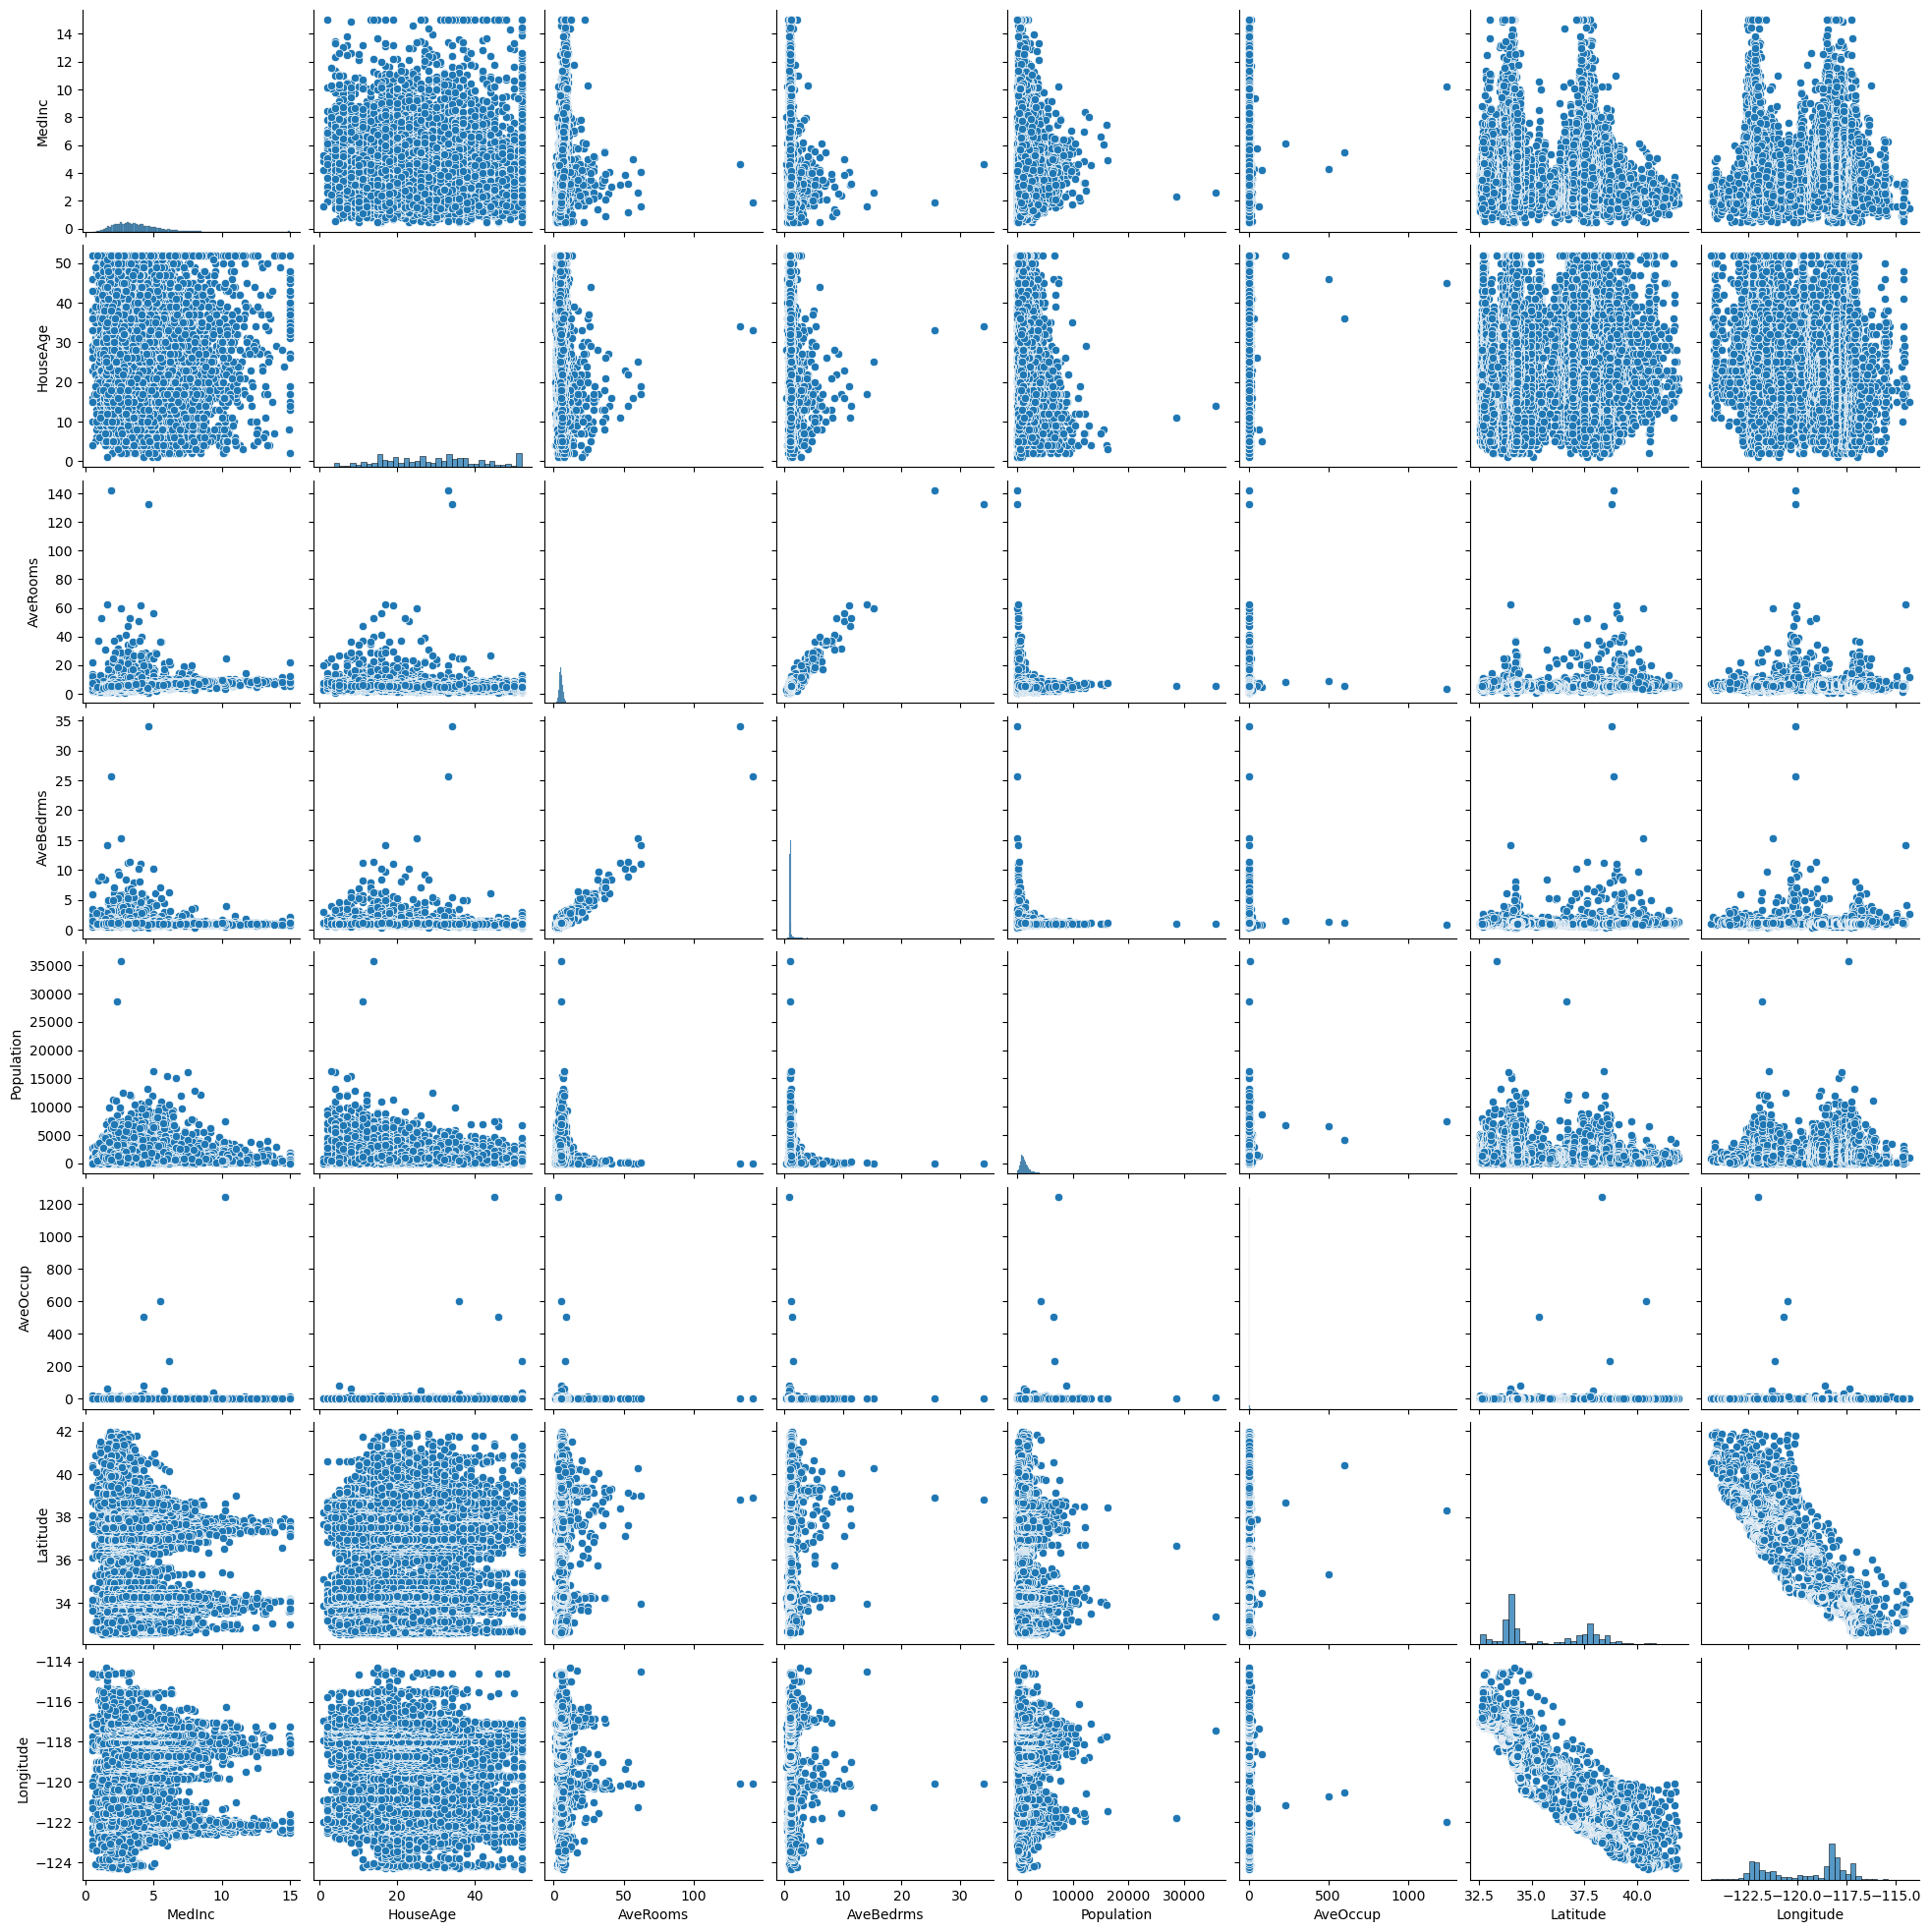

In [85]:
sns.pairplot(X)
plt.show()

In [86]:
X.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
853,4.6786,16.0,5.350061,1.088127,2530.0,3.096695,37.59,-122.03


# MIN_MAX SCALER

In [87]:
scaler = MinMaxScaler()  # scale to 0 and 1

In [88]:
X_scaled = scaler.fit_transform(X)

In [89]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [90]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train-test part

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 ,random_state=42)

In [92]:
X_train.shape

(16512, 8)

In [93]:
X_test.shape

(4128, 8)

In [94]:
y_train.shape

(16512,)

In [95]:
y_test.shape

(4128,)

# Model Building

In [96]:
model_reg = SVR()

In [97]:
model_reg.fit(X_train,y_train)

SVR()

In [98]:
y_pred = model_reg.predict(X_test)

In [99]:
mae = mean_absolute_error(y_test,y_pred)
print("Mae : ",mae)

Mae :  0.8599506583445776


In [100]:
mse = mean_squared_error(y_test,y_pred)
print("Mse : ",mse)

Mse :  1.3320115421348788


In [101]:
rmse = root_mean_squared_error(y_test,y_pred)
print("RMse : ",rmse)

RMse :  1.1541280440812791


In [102]:
model_reg.score(X_test,y_test)

-0.01648536010717705

In [103]:
sample_data = pd.DataFrame(X_scaled,columns = house.feature_names).sample()
price =  round(model_reg.predict(sample_data)[0]* 100000,2)
print(f'MedHouseVal : ${price}')

MedHouseVal : $140943.73


# Digits classification : multiclass Classification problem (SVC)

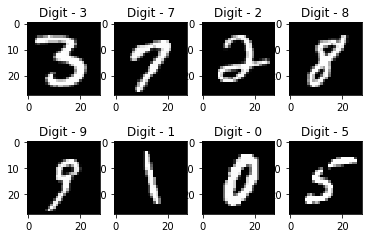

In [104]:
digits = load_digits()

In [105]:
df = pd.DataFrame(digits.data,columns= digits.feature_names)
df['target'] = digits.target

In [106]:
df.sample()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1222,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,8.0,14.0,15.0,8.0,0.0,6


In [107]:
df.shape

(1797, 65)

In [108]:
X = df.iloc[:,:-1]

In [109]:
y = df['target']

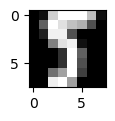

In [110]:
image_digit = X.sample().to_numpy().reshape(8,8)
plt.figure(figsize=(1,1 ))
plt.gray()
plt.imshow(image_digit)
plt.show()

In [111]:
df['target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [112]:
image_digit

array([[ 0.,  1., 13., 16., 16., 16., 12.,  1.],
       [ 0.,  6., 16., 14., 12., 11.,  5.,  0.],
       [ 0.,  2., 15., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 14., 15.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  7., 10., 16.,  4.,  0.,  0.],
       [ 0.,  0., 15., 16., 10.,  0.,  0.,  0.]])

In [113]:
# image : 0 - 255

In [114]:
scaler = MinMaxScaler()

In [115]:
X_scaled = scaler.fit_transform(X)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [117]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


In [118]:
model_cl = SVC()

In [119]:
model_cl.fit(X_train,y_train)

SVC()

In [120]:
y_pred = model_cl.predict(X_test)

In [121]:
temp_df = pd.DataFrame({'Actual class':y_test,'Predicted class':y_pred})

In [122]:
cm =confusion_matrix(y_test,y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 38]])

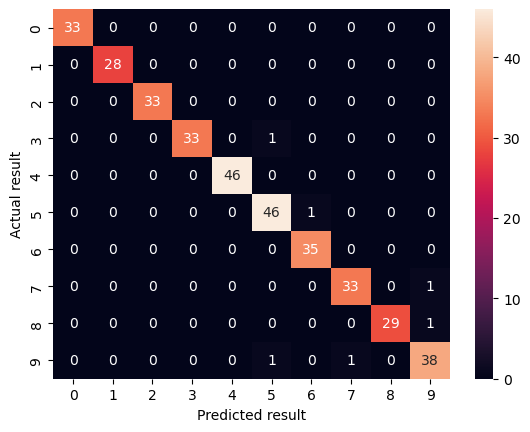

In [123]:
sns.heatmap(cm,annot =True)
plt.xlabel('Predicted result')
plt.ylabel('Actual result')
plt.show()

In [124]:
model_score = model_cl.score(X_test,y_test)

In [125]:
print(f'Model score is :{round(model_score *100,2)}%')

Model score is :98.33%


In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.99      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



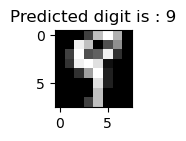

In [127]:
sample_data = pd.DataFrame(X_scaled).sample()
ans = model_cl.predict(sample_data)[0]

plt.figure(figsize=(1,1))
plt.gray()
plt.title(f'Predicted digit is : {ans}')
plt.imshow(sample_data.to_numpy().reshape(8,8))
plt.show()

# Giving image to predict

In [130]:
arr = plt.imread("C:\\Users\\SK COMPUTER\\Downloads\\img.jpg")

In [131]:
img_arr = arr.copy()

In [132]:
img_arr.shape

(8, 8, 3)

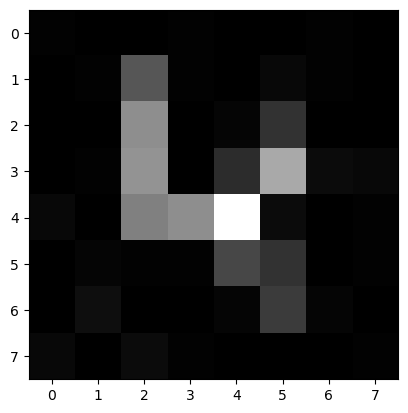

In [133]:
plt.imshow(img_arr[:,:,0])

In [134]:
img_arr = img_arr[:, :, 0] if img_arr.ndim == 3 else img_arr

In [135]:
from skimage.transform import resize
img_arr = resize(img_arr, (8, 8), anti_aliasing=True)

In [136]:
sample_data =  np.expand_dims(img_arr.flatten(),axis = 0)

In [137]:
sample_scaled_data = scaler.transform(sample_data)

In [138]:
ans = model_cl.predict(sample_scaled_data)[0]
print("Predicted digit is:", ans)

Predicted digit is: 4


In [ ]:
# Designed By  : ALTAF HUSAIN DATA ANALYST